# Clickbait Detection using only headline

### Mounting the drive (you can ignore this)

In [1]:
# conecting to the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Downloading the dataset at the right location in the google drive and extracting it.
-- You can ignore this.

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory

%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
# downloading the dataset into the drive
!kaggle competitions download -c clickbait-news-detection

 96% 27.0M/28.1M [00:00<00:00, 69.6MB/s]
100% 28.1M/28.1M [00:00<00:00, 81.0MB/s]
 91% 7.00M/7.68M [00:00<00:00, 71.0MB/s]
100% 7.68M/7.68M [00:00<00:00, 70.7MB/s]
  0% 0.00/4.04M [00:00<?, ?B/s]
100% 4.04M/4.04M [00:00<00:00, 66.5MB/s]
  0% 0.00/54.1k [00:00<?, ?B/s]
100% 54.1k/54.1k [00:00<00:00, 7.63MB/s]
 93% 101M/109M [00:01<00:00, 82.1MB/s] 
100% 109M/109M [00:01<00:00, 86.4MB/s]


In [5]:
!ls

clickbait-news-detection  test.csv	       train.csv.zip	  valid.csv.zip
kaggle.json		  test.csv.zip	       unlabeled.csv
sample_submission.csv	  thumbnail-clickbait  unlabeled.csv.zip
saved_weights.pt	  train.csv	       valid.csv


In [ ]:
!unzip \*.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  valid.csv.zip
  inflating: valid.csv               

Archive:  unlabeled.csv.zip
  inflating: unlabeled.csv           

4 archives were successfully processed.


### Importing libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
import os, sys, shutil
import time
import gc
from contextlib import contextmanager
from pathlib import Path
import random
import numpy as np, pandas as pd
from tqdm import tqdm, tqdm_notebook

from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelBinarizer
import torch
import torch.nn as nn
import torch.utils.data

from matplotlib import pyplot as plt
%config InlineBackend.figure_formats = ['retina']

In [8]:
!pip3 install transformers
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.2MB 19.8MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.3MB 53.6MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 870kB 50.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=e0fd9af8a92a2d453c148a8932f0d9f6bbe53f3e7f43c1c00f70758ec230f19f
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


In [19]:
!pip install transformers
import transformers
from transformers import AutoModel, BertTokenizerFast


In [20]:
device = torch.device('cuda')

### Downloading the pre-trained BERT model and verifying it with an example

In [21]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased',return_dict=False)

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [22]:
# sample data
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True)

# output
print(sent_id)

{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [23]:
## Please uncomment this and comment the next pd.read_csv if executing on local machine
# train_df = pd.read_csv('./Dataset/clickbait-news-detection/train.csv')
# test_df = pd.read_csv('./Dataset/clickbait-news-detection/test.csv')
# val_df = pd.read_csv('./Dataset/clickbait-news-detection/valid.csv')

train_df=pd.read_csv('/content/gdrive/MyDrive/Kaggle/train.csv')
test_df=pd.read_csv('/content/gdrive/MyDrive/Kaggle/test.csv')
valid_df=pd.read_csv('/content/gdrive/MyDrive/Kaggle/valid.csv')

In [24]:
test_df

id  ...                                               text
0        0  ...  More Try Yahoo Finance on Firefox¬†¬ª Amazon¬†CEO...
1        1  ...  More Laura Dern seems to be everywhere these d...
2        2  ...  Kirkuk is a city of Northern Iraq in the Kurdi...
3        3  ...  Experts say that communication is the cornerst...
4        4  ...  Share this with Email Facebook Messenger Messe...
...    ...  ...                                                ...
5642  5642  ...  ‚ÄúWatch out boy, she‚Äôll chew you up.‚Äù On this d...
5643  5643  ...  Fire broke out at an upmarket apartment block ...
5644  5644  ...  For the first time, a database has compiled a ...
5645  5645  ...  Vin Diesel has sometimes been known to jump th...
5646  5646  ...  In three days, Donald Trump is all set to assu...

[5647 rows x 3 columns]

In [25]:
train_df=train_df.dropna().reset_index().drop(labels=['id','index'],axis=1)
valid_df=valid_df.dropna().reset_index().drop(labels=['id','index'],axis=1)

In [26]:
train_df

title  ...      label
0      China and Economic Reform: Xi Jinping‚Äôs Track ...  ...       news
1      Trade to Be a Big Topic in Theresa May‚Äôs U.S. ...  ...       news
2      The Top Beaches In The World, According To Nat...  ...  clickbait
3      Sheriff‚Äôs Report Provides New Details on Tamir...  ...  clickbait
4      Surgeon claiming he will transplant volunteer'...  ...       news
...                                                  ...  ...        ...
19872  A very interesting user generated content website  ...      other
19873  Unable to Enter U.S., and Still Stranded Abroa...  ...       news
19874  Calais Migrant Camp Will Be Demolished Soon, F...  ...       news
19875  Twitter‚Äôs NFL Deal No Cure for User and Advert...  ...       news
19876  Five or Six Things I Didn‚Äôt Know About Brad Pi...  ...       news

[19877 rows x 3 columns]

We will use the train_df appended with the valid_df as the entire dataset does not have labels

In [27]:
train_df=train_df.append(valid_df,ignore_index=True)

In [28]:
valid_df

title  ... label
0     Trump says he is releasing something 'phenomen...  ...  news
1     Fidel Castro's ashes make their final journey ...  ...  news
2     Obama Administration Sending $500 Million to G...  ...  news
3     Insurers Are Worried About The House GOP Healt...  ...  news
4     Kobe Bryant and Nike Form Youth Basketball 'Ma...  ...  news
...                                                 ...  ...   ...
2819           The New Playboy and the End of Adulthood  ...  news
2820  Use of weaponized drones by ISIS spurs terrori...  ...  news
2821  Experts: China might be building database of f...  ...  news
2822         How Trump Can Fix His Troubled White House  ...  news
2823  A flood disaster in N.C.: Satellite photos bef...  ...  news

[2824 rows x 3 columns]

In [29]:
train_df

title  ...      label
0      China and Economic Reform: Xi Jinping‚Äôs Track ...  ...       news
1      Trade to Be a Big Topic in Theresa May‚Äôs U.S. ...  ...       news
2      The Top Beaches In The World, According To Nat...  ...  clickbait
3      Sheriff‚Äôs Report Provides New Details on Tamir...  ...  clickbait
4      Surgeon claiming he will transplant volunteer'...  ...       news
...                                                  ...  ...        ...
22696           The New Playboy and the End of Adulthood  ...       news
22697  Use of weaponized drones by ISIS spurs terrori...  ...       news
22698  Experts: China might be building database of f...  ...       news
22699         How Trump Can Fix His Troubled White House  ...       news
22700  A flood disaster in N.C.: Satellite photos bef...  ...       news

[22701 rows x 3 columns]

### Pre-processing

In [30]:
temp = list(train_df['title'])
indices=[]
count=0
for i,item in enumerate(temp):
  if len(item.split()) > 50:
    indices.append(i)
    count+=1
    #print(item)
    #print(i)
print(count)


71


In [31]:
train_df=train_df.drop(labels=indices).reset_index().drop(['index'],axis=1)

In [32]:
train_df=train_df[train_df['label']!='other'].reset_index().drop(['index'],axis=1)

In [33]:
mylist=[]
for label in list(train_df['label']):
  if label == 'clickbait':
    mylist.append(1)
  else:
    mylist.append(0)
train_df['label_int']=mylist
train_df

title  ... label_int
0      China and Economic Reform: Xi Jinping‚Äôs Track ...  ...         0
1      Trade to Be a Big Topic in Theresa May‚Äôs U.S. ...  ...         0
2      The Top Beaches In The World, According To Nat...  ...         1
3      Sheriff‚Äôs Report Provides New Details on Tamir...  ...         1
4      Surgeon claiming he will transplant volunteer'...  ...         0
...                                                  ...  ...       ...
20878           The New Playboy and the End of Adulthood  ...         0
20879  Use of weaponized drones by ISIS spurs terrori...  ...         0
20880  Experts: China might be building database of f...  ...         0
20881         How Trump Can Fix His Troubled White House  ...         0
20882  A flood disaster in N.C.: Satellite photos bef...  ...         0

[20883 rows x 4 columns]

In [34]:
#train_text,test_text,valid_text=train_df['title'],test_df['title'],valid_df['title']
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(train_df['title'], train_df['label_int'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=train_df['label_int'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

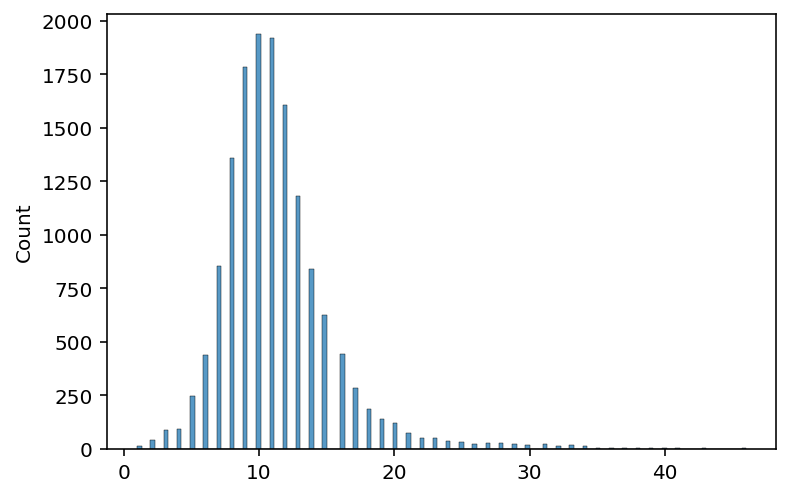

In [35]:
# get length of all the messages in the train set
import seaborn as sns
seq_len = [len(i.split()) for i in train_text]

sns.histplot(seq_len)

In [36]:
seq_len.index(max(seq_len))

14242

### Tokenizing the headlines

In [38]:
# tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 20,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 20,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 20,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [39]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

### Creating data loaders

In [40]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [41]:
set(list(train_df['label']))

{'clickbait', 'news'}

In [42]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

### Defining the Architecture

In [73]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      # self.dropout = nn.Dropout(0.3)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      #self.fc1 = nn.Linear(768,2)
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.Softmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      # x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      #x = self.dropout(x)
      # apply softmax activation
      x = self.softmax(x)

      return x

In [74]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [75]:
# optimizer from hugging face transformers
from transformers import AdamW
from torch.optim import Adam

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 2e-5) 
#optimizer = Adam(model.parameters(),lr=2e-5)

clickbait:  4244
news:  16639


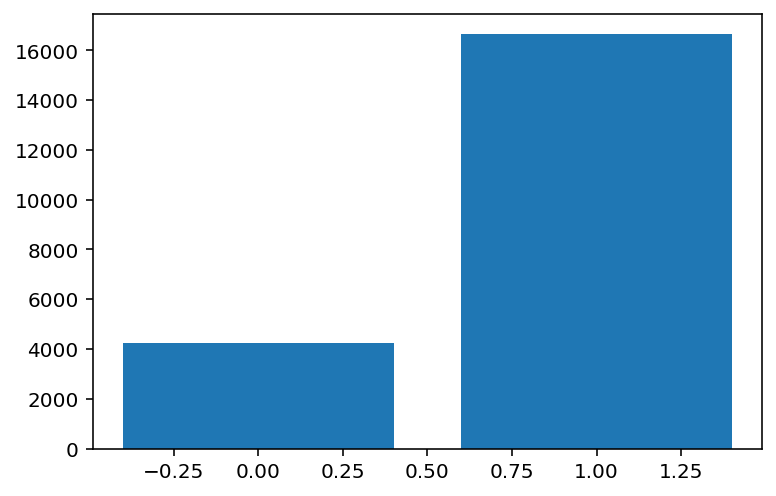

In [76]:
# check for class imbalance
count1=0
count2=0
for i in mylist:
  if i == 1:
    count1+=1
  else:
    count2+=1
print('clickbait: ',count1 )
print('news: ',count2)
#sns.barplot(x=range(2),y=[count1,count2])
count=[count1,count2]
plt.bar(range(len(count)), count)
plt.show()

In [77]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight('balanced', np.unique(train_labels), train_labels)

print("Class Weights:",class_weights)

Class Weights: [0.62754357 2.46011444]


In [78]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
#cross_entropy  = nn.NLLLoss(weight=weights) 
cross_entropy = nn.CrossEntropyLoss(weight=weights)
# number of training epochs
epochs = 15

In [79]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [80]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
     # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [81]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 15
  Batch    50  of    457.
  Batch   100  of    457.
  Batch   150  of    457.
  Batch   200  of    457.
  Batch   250  of    457.
  Batch   300  of    457.
  Batch   350  of    457.
  Batch   400  of    457.
  Batch   450  of    457.

Evaluating...
  Batch    50  of     98.

Training Loss: 0.681
Validation Loss: 0.670

 Epoch 2 / 15
  Batch    50  of    457.
  Batch   100  of    457.
  Batch   150  of    457.
  Batch   200  of    457.
  Batch   250  of    457.
  Batch   300  of    457.
  Batch   350  of    457.
  Batch   400  of    457.
  Batch   450  of    457.

Evaluating...
  Batch    50  of     98.

Training Loss: 0.662
Validation Loss: 0.657

 Epoch 3 / 15
  Batch    50  of    457.
  Batch   100  of    457.
  Batch   150  of    457.
  Batch   200  of    457.
  Batch   250  of    457.
  Batch   300  of    457.
  Batch   350  of    457.
  Batch   400  of    457.
  Batch   450  of    457.

Evaluating...
  Batch    50  of     98.

Training Loss: 0.652
Validation Loss: 0

### Plotting the test and validition loss

```
# This is formatted as code
```



No handles with labels found to put in legend.


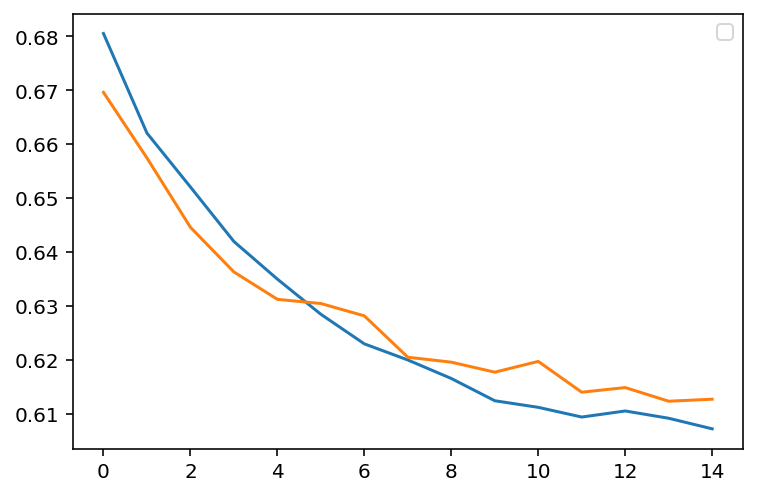

In [82]:
sns.lineplot(data=train_losses)
sns.lineplot(data=valid_losses)
plt.legend()
plt.show()

### Evaluating on test set

In [83]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [84]:
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2496
           1       0.38      0.55      0.45       637

    accuracy                           0.73      3133
   macro avg       0.63      0.66      0.63      3133
weighted avg       0.77      0.73      0.74      3133



In [89]:
preds

array([0, 1, 0, ..., 0, 1, 0])

In [90]:
test_y

tensor([0, 1, 0,  ..., 0, 0, 0])

# ClickBait with Thumbnails

### Importing Libraries

In [91]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from torch.autograd import Variable
import torchvision.models as models
from torch.autograd import Variable


from PIL import Image
%matplotlib inline

In [92]:
#data_dir = "/content/gdrive/MyDrive/Kaggle/thumbnail-clickbait/clickbait-thumbnail-detection/thumbnails/"
data_dir = "./Dataset/clickbait-thumbnail-detection/thumbnails"

In [93]:
import pandas as pd
#mydf=pd.read_csv('/content/gdrive/MyDrive/Kaggle/thumbnail-clickbait/clickbait-thumbnail-detection/train.csv')
mydf = pd.read_csv('./Dataset/clickbait-thumbnail-detection/train.csv')
mydf

ID  ...  class
0     wutdQ_kzNn0  ...   True
1     WVaLM-kIZgg  ...  False
2     cKAKayQ4F9o  ...   True
3     ZwqOoD17_LU  ...  False
4     MhXDnHIOP9w  ...  False
...           ...  ...    ...
7100  wFU8plUZccs  ...  False
7101  R3GlwN8ju2E  ...   True
7102  a__Y8G5qEuI  ...   True
7103  WlriwanO4e4  ...  False
7104  i9D_Ie4jRNw  ...  False

[7105 rows x 20 columns]

### Checking out the shape, type and other properties of images
-- Uncomment cells if you want to see the images in the dataset



In [94]:
img_ids=list(mydf['ID'])
img_ids

['wutdQ_kzNn0',
 'WVaLM-kIZgg',
 'cKAKayQ4F9o',
 'ZwqOoD17_LU',
 'MhXDnHIOP9w',
 'kO27LbAKsjg',
 'Fg1B5W2TlcM',
 'Dv2zWnFMbmA',
 'QCwLZM_BL_M',
 '7BdVVeLLdAI',
 '-xbtnz4wdaA',
 '2nttDEDI54I',
 'AhaPyRGKQ5M',
 'ATojoFL-CBI',
 'hO_SzV6DaD0',
 '8ynclk6IS5g',
 '7nXvv4ClyIs',
 '_OdRiluqxO4',
 'sBBP0hW-ZCM',
 'waxuMpRyZr0',
 '4vvc8Cd1hEY',
 'r0Jodzn2t5M',
 'c9xZE3g-XJI',
 'hLOc0PnDDTY',
 'zXbortaLKDE',
 'tlFt522ei7k',
 'JZYzh-ySlfs',
 'kbi8b2t5CmE',
 'mJeLGd3JV2I',
 'ck1JW-_G2Yc',
 '-k3IUNZuA-g',
 'x0jIz3dZxnU',
 '7o4I0uDtqMg',
 'eXK9B-Uyoqo',
 'ARA0AxrnHdM',
 'QWB2l2gDqUw',
 '39MLkF21rgs',
 '2HNfdKcBuVI',
 '3Nu5RjfxVL4',
 'cU_TMypuHXs',
 '0-diECOzCnE',
 '-1Tg2-NuEVU',
 'BRBxtAF7s6w',
 'pp7YOTqKTWU',
 'F2-OboKKTlw',
 'fwX-39oEeIE',
 'NPuYtHZud0o',
 'BOa6HU_he2A',
 'pvR91fvLp5A',
 'B1CZXzd5mHs',
 'TGmhnWaByXE',
 'v05kJqPPilI',
 'sE53eSbzxoU',
 'FXW7Ii6QmpU',
 'vW_hMlcWihk',
 '3UxtKALtA1o',
 'Wi8BwUh3XOk',
 'umYdk596x9k',
 'dB4s4H4zuQk',
 '8UufG-n-mWs',
 'nXyvqWlvLl4',
 '5m2sk1ZUqwc',
 'U5tGd_

In [95]:
img1= Image.open(data_dir+img_ids[0]+'.jpg')

In [96]:
img1.info

{'jfif': 257, 'jfif_density': (1, 1), 'jfif_unit': 0, 'jfif_version': (1, 1)}

In [97]:
img1.size

(480, 360)

In [98]:
img2= Image.open(data_dir+img_ids[1]+'.jpg')
img2.mode

'RGB'

In [101]:
# img2

In [102]:
# img1

### Defining the transformations on images in order to feed into ResNet 18 Model

In [103]:
#crop=T.CenterCrop((300,480))
scaler = T.Scale((224, 224))
normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = T.ToTensor()

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [106]:
# crop=T.CenterCrop((300,480))
# t_img1 = Variable(normalize(to_tensor(scaler(crop(img1)))))

In [107]:
# plt.imshow(t_img1.permute(1, 2, 0))

In [108]:
# t_img1.shape

### Function to get the vector representation of Image (Just for testing)
-- You can ignore this

In [113]:
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [114]:
def get_vector(image_name):
    img = Image.open(image_name)
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
    my_embedding = feature_extractor(t_img)
    return my_embedding

In [115]:
img1_vec=get_vector(data_dir+img_ids[0]+'.jpg')

In [116]:
#model

In [117]:
img1_vec=img1_vec.reshape((-1,512))

In [ ]:
img1_vec.shape

torch.Size([1, 512])

### Defining the architecture for the model
There are three classes, one corresponding to BERT which gives the feature representation of text, one corresponding to resnet which gives the feature representation of the image and an ensemble model which concatenates both these outputs and uses a MLP on top as described (These are the trainable weights but we can chose to finetune BERT and ResNet as well)

In [118]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      #self.dropout = nn.Dropout(0.3)
      
      # relu activation function
      #self.relu =  nn.ReLU()

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask)
      x=cls_hs
      return x

class myResNet(nn.Module):
    def __init__(self, resnet):
      
      super(myResNet, self).__init__()

      self.resnet = resnet 
    def forward(self,img):
      x = self.resnet(img)
      x = x.reshape((-1,512))
      return x
       
class MyEnsemble(nn.Module):
    def __init__(self, modelA, modelB):
        super(MyEnsemble, self).__init__()
        self.modelA = modelA
        self.modelB = modelB
        #self.classifier = nn.Linear(768+512, 2)
      # dense layer 1
        self.fc1 = nn.Linear(768+512,512).to(device)
        self.fc2 = nn.Linear(512,2).to(device)
        self.relu =  nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, bert1, bert2,res1):
        x1 = self.modelA(bert1,bert2)
        x2 = self.modelB(res1)
        x = torch.cat((x1, x2), dim=1)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        x=self.softmax(x)
        #x = self.classifier()
        return x


In [ ]:
# model = models.resnet18(pretrained=True).to(device)
# feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
# model1 = myResNet(feature_extractor)
# model1.to(device)

In [ ]:
# model1(img1).shape

### Cleaning the Dataframe a little

In [119]:
mydf=mydf.drop(labels=['timestamp',	'viewCount',	'likeCount','dislikeCount'	,'commentCount',	'user_comment_1'	,'user_comment_2'	,'user_comment_3'	,'user_comment_4',	'user_comment_5'	,'user_comment_6',	'user_comment_7'	,'user_comment_8',	'user_comment_9',	'user_comment_10','URL'],axis=1)

In [120]:
class_=[]
for i,row in mydf.iterrows():
  if row['class'] == True:
    class_.append(1)
  else:
    class_.append(0)
mydf['class_']=class_
mydf

ID  ... class_
0     wutdQ_kzNn0  ...      1
1     WVaLM-kIZgg  ...      0
2     cKAKayQ4F9o  ...      1
3     ZwqOoD17_LU  ...      0
4     MhXDnHIOP9w  ...      0
...           ...  ...    ...
7100  wFU8plUZccs  ...      0
7101  R3GlwN8ju2E  ...      1
7102  a__Y8G5qEuI  ...      1
7103  WlriwanO4e4  ...      0
7104  i9D_Ie4jRNw  ...      0

[7105 rows x 5 columns]

### Splitting the dataframe into train, test and validation sets

In [121]:
 traindf, valdf, testdf = \
              np.split(mydf.sample(frac=1, random_state=42), 
                       [int(.8*len(mydf)), int(.9*len(mydf))])

In [122]:
traindf

ID  ... class_
6421  L9LcmaOYA5Q  ...      1
5681  tOctS0PNa_4  ...      1
4678  YhSImgCPYfs  ...      1
4834  0h9UL_EizkE  ...      1
5652  yQliow4ghtU  ...      0
...           ...  ...    ...
6663  AUjugyDyYnA  ...      1
6424  2zS8RmOnYwI  ...      0
6272  pK-G259VX6U  ...      0
6851  T4DMD9wdqog  ...      1
5000  VGFoJm6JDBI  ...      1

[5684 rows x 5 columns]

In [123]:
testdf

ID  ... class_
5772  _hBAr7uJ6L8  ...      0
5293  6mahB8pi_sc  ...      1
1542  6B7vPTTc4yA  ...      1
3301  8bU31q4J7Tk  ...      0
3324  umzbLnLghsQ  ...      1
...           ...  ...    ...
3772  1qyyXfQL5jU  ...      1
5191  yI3K0Us3Jlw  ...      0
5226  06JHIp5gU4c  ...      0
5390  cUy82r73nRU  ...      1
860   d-VIelNGxXg  ...      1

[711 rows x 5 columns]

In [124]:
valdf

ID  ... class_
1279  eneUvVqHd1w  ...      0
6337  e7WpRzSnNAU  ...      0
6961  todLLOXOTJ0  ...      0
1555  54z8jWNM0bE  ...      0
6419  VzPDio0D6Jc  ...      1
...           ...  ...    ...
2681  BhmdnrT-GHM  ...      0
2993  NLyQkBSN50w  ...      1
5512  mjfaUtELFWo  ...      1
6313  gKnBcyEjHuk  ...      0
1191  meBNkmhCuhs  ...      0

[710 rows x 5 columns]

### Creating the train, test and validation masks

In [125]:
t_mask=[]
v_mask=[]
tes_mask=[]
for i in list(mydf.index):
  if i in list(traindf.index):
    t_mask.append(True)
    tes_mask.append(False)
    v_mask.append(False)
  elif i in list(testdf.index):
    t_mask.append(False)
    tes_mask.append(True)
    v_mask.append(False)
  else:
    t_mask.append(False)
    tes_mask.append(False)
    v_mask.append(True)  

In [126]:
len(tes_mask)

7105

### Picking the title as the text input and tokenizing it for BERT

In [127]:
train_text=traindf['title'].to_numpy()
val_text=valdf['title'].to_numpy()
test_text=testdf['title'].to_numpy()

In [128]:
train_labels=traindf['class_'].to_numpy()
test_labels=testdf['class_'].to_numpy()
val_labels=valdf['class_'].to_numpy()

In [129]:
len(train_text)

5684

In [130]:
train_text

array(["Here's Why This Water Bottle is Worth $100",
       'KID GETS CAUGHT STEALING',
       'Pewdiepie vs Tseries the Anime  LWIAY - #0069', ...,
       'Guy Creates Fire With Bare Hands!! (IMPOSSIBLE)',
       'In 1948 a Fighter Pilot Pursued a Mystery Speeding Craft ‚Äì but Then It Vanished into Thin Air',
       'The forbeedden game'], dtype=object)

In [131]:
traindf

ID  ... class_
6421  L9LcmaOYA5Q  ...      1
5681  tOctS0PNa_4  ...      1
4678  YhSImgCPYfs  ...      1
4834  0h9UL_EizkE  ...      1
5652  yQliow4ghtU  ...      0
...           ...  ...    ...
6663  AUjugyDyYnA  ...      1
6424  2zS8RmOnYwI  ...      0
6272  pK-G259VX6U  ...      0
6851  T4DMD9wdqog  ...      1
5000  VGFoJm6JDBI  ...      1

[5684 rows x 5 columns]

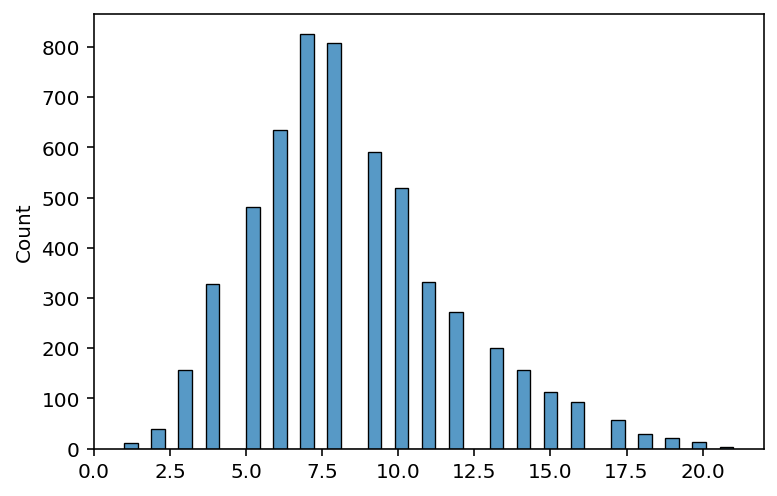

In [132]:
# get length of all the messages in the train set this helps to identify the length of sentence to be fixed for buffer (taken 20)
import seaborn as sns
seq_len = [len(i.split()) for i in train_text]

sns.histplot(seq_len)

In [133]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased',return_dict=False)

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

#Tokenizing train,test and validation for bert
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 20,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 20,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 20,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [134]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())
#train_img = x = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0)).to(device)

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())


test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

### Transforming the images to tensors as required by ResNet 18

In [135]:
train_imgs = []
count=0
for i,row in traindf.iterrows():
  count+=1
  print(count)
  img=Image.open(data_dir+row['ID']+'.jpg')
  train_imgs.append(Variable(normalize(to_tensor(scaler(img))).unsqueeze(0)).to(device))

Streaming output truncated to the last 5000 lines.
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
9

In [136]:
train_imgs_t= torch.stack(train_imgs).to(device)

In [137]:
train_imgs_t = train_imgs_t.reshape(-1,3,224,224)

In [138]:
train_imgs_t.shape

torch.Size([5684, 3, 224, 224])

In [139]:
test_imgs = []
count=0
for i,row in testdf.iterrows():
  count+=1
  print(count)
  img=Image.open(data_dir+row['ID']+'.jpg')
  test_imgs.append(Variable(normalize(to_tensor(scaler(img))).unsqueeze(0)).to(device))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [140]:
val_imgs = []
count=0
for i,row in valdf.iterrows():
  count+=1
  print(count)
  img=Image.open(data_dir+row['ID']+'.jpg')
  val_imgs.append(Variable(normalize(to_tensor(scaler(img))).unsqueeze(0)).to(device))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [141]:
val_imgs_t=torch.stack(val_imgs).reshape(-1,3,224,224)
val_imgs_t.shape

torch.Size([710, 3, 224, 224])

### Generating the dataloaders using input as images along with headlines

In [142]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 16

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_imgs_t, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_imgs_t, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

### Defining the model and freezing the parameters of BERT and ResNet, we can change this to finetune them also

In [143]:
model_temp = models.resnet18(pretrained=True).to(device)
feature_extractor = torch.nn.Sequential(*list(model_temp.children())[:-1])

In [144]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [145]:
for param in feature_extractor.parameters():
    param.requires_grad = False

In [146]:
model1=BERT_Arch(bert).to(device)
model2 = myResNet(feature_extractor)
model2.to(device)
model=MyEnsemble(model1,model2)

### Checking for class imbalance

clickbait:  3548
news:  3557


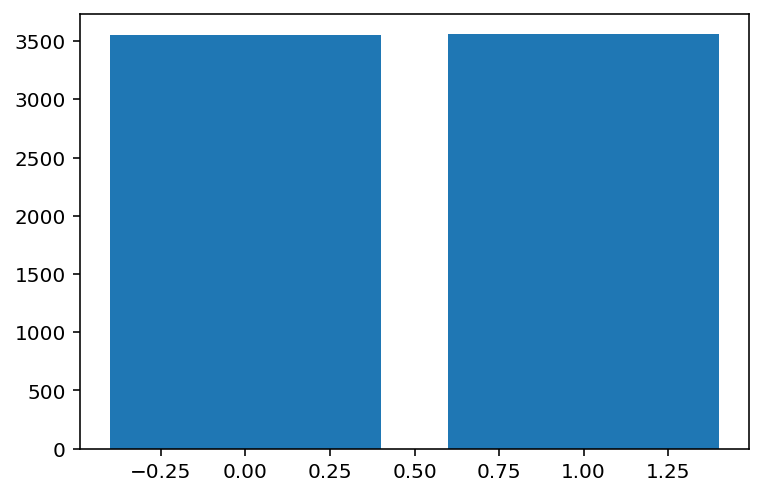

In [147]:
# check for class imbalance
mylist=list(mydf['class_'])
count1=0
count2=0
for i in mylist:
  if i == 1:
    count1+=1
  else:
    count2+=1
print('clickbait: ',count1 )
print('news: ',count2)
#sns.barplot(x=range(2),y=[count1,count2])
count=[count1,count2]
plt.bar(range(len(count)), count)
plt.show()

### Defining model hyperparamers, optimizer and loss function

In [148]:
# optimizer from hugging face transformers
from transformers import AdamW
from torch.optim import Adam

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 2e-5) 
epochs = 20
cross_entropy = nn.CrossEntropyLoss()
#optimizer = Adam(model.parameters(),lr=2e-5)

In [149]:
# from sklearn.utils.class_weight import compute_class_weight

# #compute the class weights
# class_weights = compute_class_weight('balanced', np.unique(train_labels), train_labels)

# print("Class Weights:",class_weights)

In [150]:
# # converting list of class weights to a tensor
# weights= torch.tensor(class_weights,dtype=torch.float)

# # push to GPU
# weights = weights.to(device)

# define the loss function
#cross_entropy  = nn.NLLLoss(weight=weights) 
# cross_entropy = nn.CrossEntropyLoss()
# # number of training epochs
# epochs = 10

### Defining Train, Evaluate functions

In [151]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, imgs, labels = batch
    imgs=imgs.reshape((-1,3,224,224))
    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask, imgs)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [152]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
     # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, imgs, labels = batch
    imgs=imgs.reshape((-1,3,224,224))
    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask, imgs)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

### Training the model

In [153]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 20
  Batch    50  of    356.
  Batch   100  of    356.
  Batch   150  of    356.
  Batch   200  of    356.
  Batch   250  of    356.
  Batch   300  of    356.
  Batch   350  of    356.

Evaluating...

Training Loss: 0.646
Validation Loss: 0.600

 Epoch 2 / 20
  Batch    50  of    356.
  Batch   100  of    356.
  Batch   150  of    356.
  Batch   200  of    356.
  Batch   250  of    356.
  Batch   300  of    356.
  Batch   350  of    356.

Evaluating...

Training Loss: 0.580
Validation Loss: 0.552

 Epoch 3 / 20
  Batch    50  of    356.
  Batch   100  of    356.
  Batch   150  of    356.
  Batch   200  of    356.
  Batch   250  of    356.
  Batch   300  of    356.
  Batch   350  of    356.

Evaluating...

Training Loss: 0.549
Validation Loss: 0.521

 Epoch 4 / 20
  Batch    50  of    356.
  Batch   100  of    356.
  Batch   150  of    356.
  Batch   200  of    356.
  Batch   250  of    356.
  Batch   300  of    356.
  Batch   350  of    356.

Evaluating...

Training Loss: 0

No handles with labels found to put in legend.


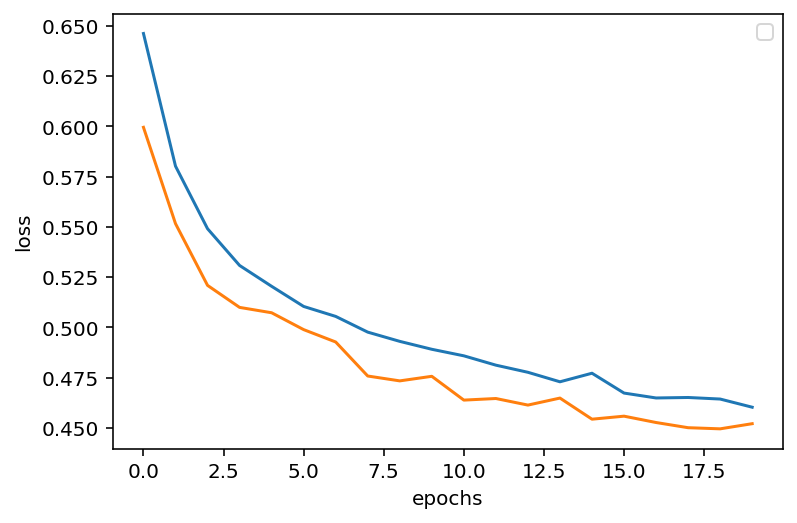

In [154]:
sns.lineplot(data=train_losses)
sns.lineplot(data=valid_losses)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Evaluating the Model

In [155]:
test_imgs_t=torch.stack(test_imgs).to(device)

In [156]:
# get predictions for test data
# wrap tensors
test_data = TensorDataset(test_seq, test_mask, test_imgs_t, test_y)

# sampler for sampling the data during training
#test_sampler = RandomSampler(test_data)

# dataLoader for train set
test_dataloader = DataLoader(test_data, batch_size=batch_size)
mylist=[]
with torch.no_grad():
  for step,batch in enumerate(test_dataloader):
    sent_id, mask, imgs, labels = batch
    imgs=imgs.reshape(-1,3,224,224)
    print(sent_id.shape, mask.shape, imgs.shape, labels)
    preds=model(sent_id.to(device),mask.to(device),imgs.to(device))
    preds = list(preds.detach().cpu().numpy())
    for pred in preds:
      mylist.append(pred)

torch.Size([16, 20]) torch.Size([16, 20]) torch.Size([16, 3, 224, 224]) tensor([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])
torch.Size([16, 20]) torch.Size([16, 20]) torch.Size([16, 3, 224, 224]) tensor([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])
torch.Size([16, 20]) torch.Size([16, 20]) torch.Size([16, 3, 224, 224]) tensor([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])
torch.Size([16, 20]) torch.Size([16, 20]) torch.Size([16, 3, 224, 224]) tensor([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])
torch.Size([16, 20]) torch.Size([16, 20]) torch.Size([16, 3, 224, 224]) tensor([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0])
torch.Size([16, 20]) torch.Size([16, 20]) torch.Size([16, 3, 224, 224]) tensor([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1])
torch.Size([16, 20]) torch.Size([16, 20]) torch.Size([16, 3, 224, 224]) tensor([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0])
torch.Size([16, 20]) torch.Size([16, 20]) torch.Size([16, 3, 224, 224]) tensor([1, 0, 0, 0, 0, 1,

In [157]:
#mylist

In [158]:
preds=torch.tensor(mylist)
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       387
           1       0.87      0.79      0.83       324

    accuracy                           0.85       711
   macro avg       0.85      0.84      0.85       711
weighted avg       0.85      0.85      0.85       711



In [229]:
# testdf

In [228]:
# testdf['title'][3772]

In [227]:
# my_image_1 = Image.open(data_dir+'1qyyXfQL5jU.jpg')
# my_image_1

In [160]:
# #load weights of best model
# path = 'saved_weights.pt'
# model.load_state_dict(torch.load(path))

In [ ]:
# # get predictions for test data
# with torch.no_grad():
#   preds = model(test_seq.to(device), test_mask.to(device))
#   preds = preds.detach().cpu().numpy()

In [ ]:
# |preds = np.argmax(preds, axis = 1)
# print(classification_report(test_y, preds))

In [206]:
# train_seq.shape

In [205]:
# traindf["ID"]

### Comparing our model with training using only Headlines

In [207]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [208]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [209]:
class BERT_Arch1(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch1, self).__init__()
      self.bert = bert 
      # dropout layer
      self.dropout = nn.Dropout(0.3)
      # relu activation function
      self.relu =  nn.ReLU()
      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)
      #softmax activation function
      self.softmax = nn.Softmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask)
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc2(x)
      # apply softmax activation
      x = self.softmax(x)

      return x

In [210]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch1(bert)

# push the model to GPU
model = model.to(device)

# optimizer from hugging face transformers
from transformers import AdamW
from torch.optim import Adam

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 2e-5) 
#optimizer = Adam(model.parameters(),lr=2e-5)

In [211]:
epochs = 35
cross_entropy = nn.CrossEntropyLoss()

In [212]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [213]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
     # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [214]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 35
  Batch    50  of    178.
  Batch   100  of    178.
  Batch   150  of    178.

Evaluating...

Training Loss: 0.688
Validation Loss: 0.687

 Epoch 2 / 35
  Batch    50  of    178.
  Batch   100  of    178.
  Batch   150  of    178.

Evaluating...

Training Loss: 0.680
Validation Loss: 0.672

 Epoch 3 / 35
  Batch    50  of    178.
  Batch   100  of    178.
  Batch   150  of    178.

Evaluating...

Training Loss: 0.670
Validation Loss: 0.660

 Epoch 4 / 35
  Batch    50  of    178.
  Batch   100  of    178.
  Batch   150  of    178.

Evaluating...

Training Loss: 0.662
Validation Loss: 0.653

 Epoch 5 / 35
  Batch    50  of    178.
  Batch   100  of    178.
  Batch   150  of    178.

Evaluating...

Training Loss: 0.652
Validation Loss: 0.646

 Epoch 6 / 35
  Batch    50  of    178.
  Batch   100  of    178.
  Batch   150  of    178.

Evaluating...

Training Loss: 0.644
Validation Loss: 0.637

 Epoch 7 / 35
  Batch    50  of    178.
  Batch   100  of    178.
  Batch   150  

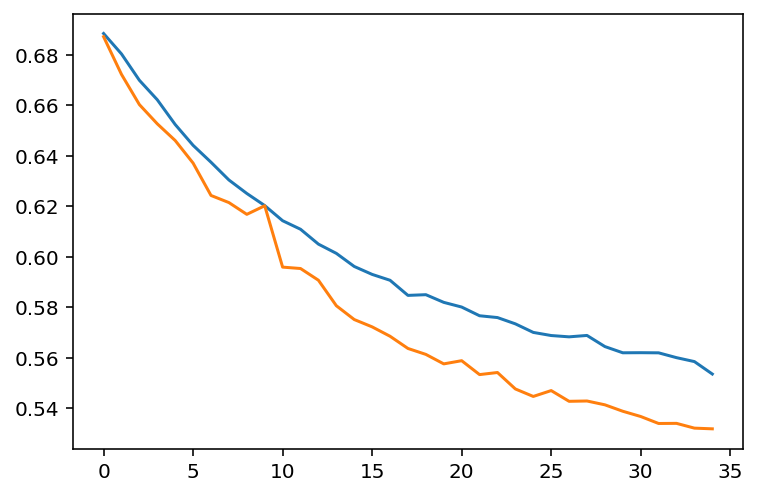

In [216]:
sns.lineplot(data=train_losses)
sns.lineplot(data=valid_losses)
plt.show()

In [217]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       387
           1       0.75      0.76      0.75       324

    accuracy                           0.77       711
   macro avg       0.77      0.77      0.77       711
weighted avg       0.77      0.77      0.77       711



### Comparing our model with training using only Thumbnails

In [230]:
class myResNet1(nn.Module):
    def __init__(self, resnet):
      
      super(myResNet1, self).__init__()
      self.resnet = resnet.to(device)
      # dropout layer
      self.dropout = nn.Dropout(0.3).to(device)
      # relu activation function
      self.relu =  nn.ReLU().to(device)
      # dense layer 1
      self.fc1 = nn.Linear(512,512).to(device)
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2).to(device)
      #softmax activation function
      self.softmax = nn.Softmax(dim=1).to(device)

    def forward(self,img):
      x = self.resnet(img)
      x = x.reshape(-1, 512)
      x=self.fc1(x)
      x=self.relu(x)
      x=self.fc2(x)
      x=self.softmax(x)
      return x

In [231]:
train_y = torch.tensor(train_labels.tolist())
val_y = torch.tensor(val_labels.tolist())
test_y = torch.tensor(test_labels.tolist())

In [232]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 16

# wrap tensors
train_data = TensorDataset(train_imgs_t, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_imgs_t, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [233]:
model_temp = models.resnet18(pretrained=True).to(device)
feature_extractor = torch.nn.Sequential(*list(model_temp.children())[:-1])

In [234]:
for param in feature_extractor.parameters():
    param.requires_grad = False

In [235]:
model = myResNet1(feature_extractor.to(device))
model.to(device)

myResNet1(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [236]:
# optimizer from hugging face transformers
from transformers import AdamW
from torch.optim import Adam

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 2e-5) 
#optimizer = Adam(model.parameters(),lr=2e-5)

epochs = 10
cross_entropy = nn.CrossEntropyLoss()

In [237]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    image, labels = batch
    image = image.reshape((-1,3,224,224)).to(device)

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(image)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [238]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
     # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    image, labels = batch
    image = image.reshape((-1,3,224,224)).to(device)

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(image)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [239]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch    50  of    356.
  Batch   100  of    356.
  Batch   150  of    356.
  Batch   200  of    356.
  Batch   250  of    356.
  Batch   300  of    356.
  Batch   350  of    356.

Evaluating...

Training Loss: 0.654
Validation Loss: 0.608

 Epoch 2 / 10
  Batch    50  of    356.
  Batch   100  of    356.
  Batch   150  of    356.
  Batch   200  of    356.
  Batch   250  of    356.
  Batch   300  of    356.
  Batch   350  of    356.

Evaluating...

Training Loss: 0.597
Validation Loss: 0.569

 Epoch 3 / 10
  Batch    50  of    356.
  Batch   100  of    356.
  Batch   150  of    356.
  Batch   200  of    356.
  Batch   250  of    356.
  Batch   300  of    356.
  Batch   350  of    356.

Evaluating...

Training Loss: 0.569
Validation Loss: 0.546

 Epoch 4 / 10
  Batch    50  of    356.
  Batch   100  of    356.
  Batch   150  of    356.
  Batch   200  of    356.
  Batch   250  of    356.
  Batch   300  of    356.
  Batch   350  of    356.

Evaluating...

Training Loss: 0

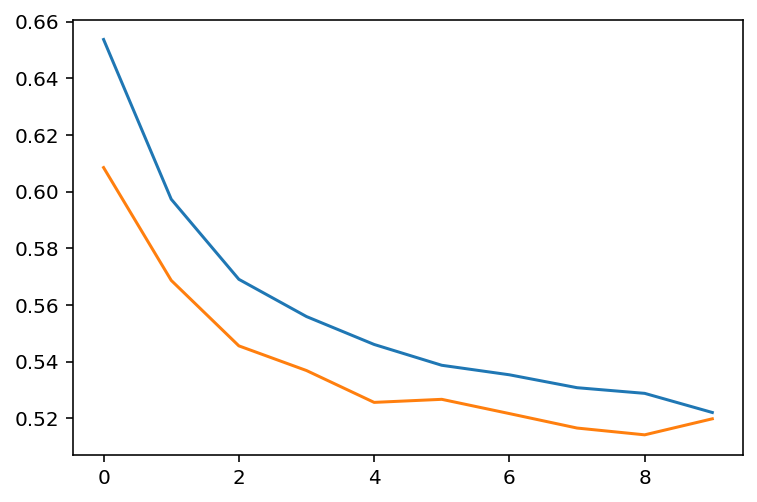

In [240]:
import seaborn as sns
sns.lineplot(data=train_losses)
sns.lineplot(data=valid_losses)
plt.show()

In [242]:
# get predictions for test data
with torch.no_grad():
  test_imgs_t = test_imgs_t.reshape((-1, 3, 224, 224))
  preds = model(test_imgs_t.to(device))
  preds = preds.detach().cpu().numpy()
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

# Thank You
Team: Pied Piper